# Case study

## Introducing the data

### Email data set

spam,median(num_char),IQR(num_char)
0,6.831,13.58225
1,1.046,2.81800


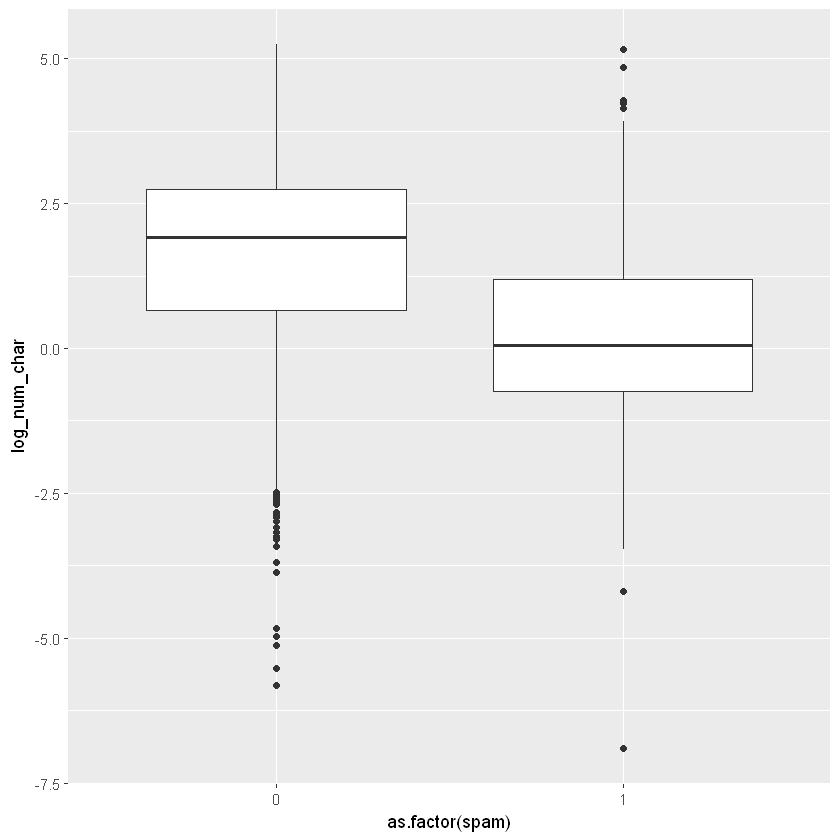

In [9]:
# Load packages
library(ggplot2)
library(dplyr)
library(openintro)

# Compute summary statistics
email %>%
  group_by(spam) %>%
  summarise(median(num_char),
            IQR(num_char))

# Create plot
email %>%
  mutate(log_num_char = log(num_char)) %>%
  ggplot(aes(x = as.factor(spam), y = log_num_char)) +
  geom_boxplot()

### Spam and !!!

Let's look at a more obvious indicator of spam: exclamation marks. exclaim_mess contains the number of exclamation marks in each message. Using summary statistics and visualization, see if there is a relationship between this variable and whether or not a message is spam.

Experiment with different types of plots until you find one that is the most informative. Recall that you've seen:

* Side-by-side box plots
* Faceted histograms
* Overlaid density plots

INSTRUCTIONS

The email dataset is still available in your workspace.

* Calculate appropriate measures of the center and spread of exclaim_mess for both spam and not-spam using group_by() and summarize().
* Construct an appropriate plot to visualize the association between the same two variables, adding in a log-transformation step if necessary.
* If you decide to use a log transformation, remember that log(0) is -Inf in R, which isn't a very useful value! You can get around this by adding a small number (like .01) to the quantity inside the log() function. This way, your value is never zero. This small shift to the right won't affect your results.

In [25]:
# Check the data types of email data set
glimpse(email)

# Convert spam from double to factor
email$spam         <- as.factor(email$spam)
levels(email$spam) <- c("not-spam", "spam")

Observations: 3,921
Variables: 21
$ spam         <fctr> not-spam, not-spam, not-spam, not-spam, not-spam, not...
$ to_multiple  <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ from         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ cc           <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, ...
$ sent_email   <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
$ time         <dttm> 2012-01-01 15:16:41, 2012-01-01 16:03:59, 2012-01-02 ...
$ image        <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ attach       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ dollar       <dbl> 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, ...
$ winner       <fctr> no, no, no, no, no, no, no, no, no, no, no, no, no, n...
$ inherit      <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ viagra       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ password     <db

spam,median(exclaim_mess),IQR(exclaim_mess)
not-spam,1,5
spam,0,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


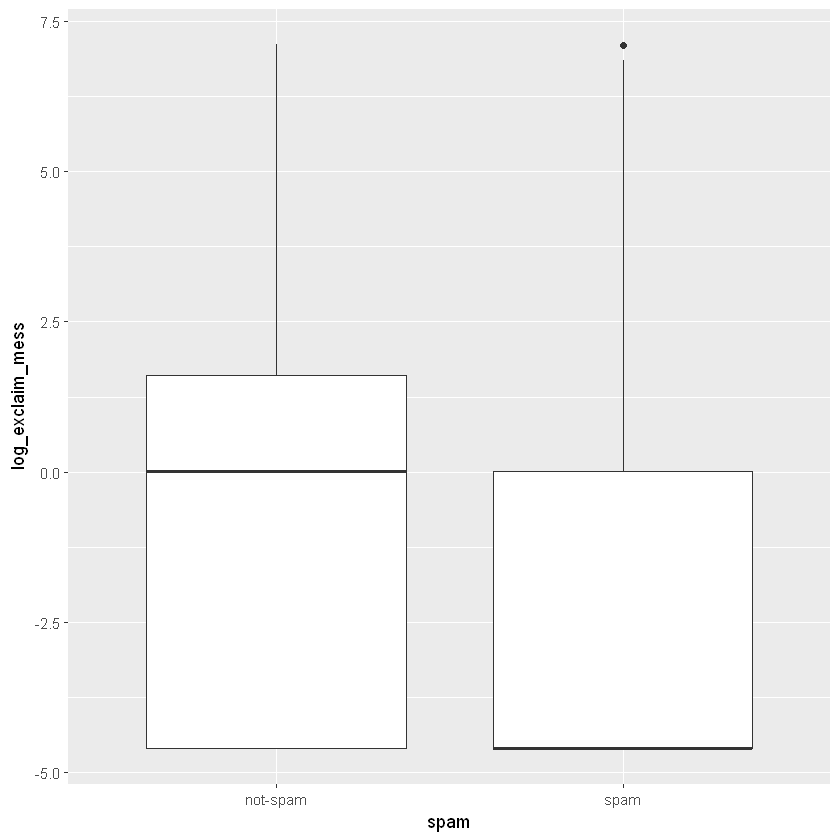

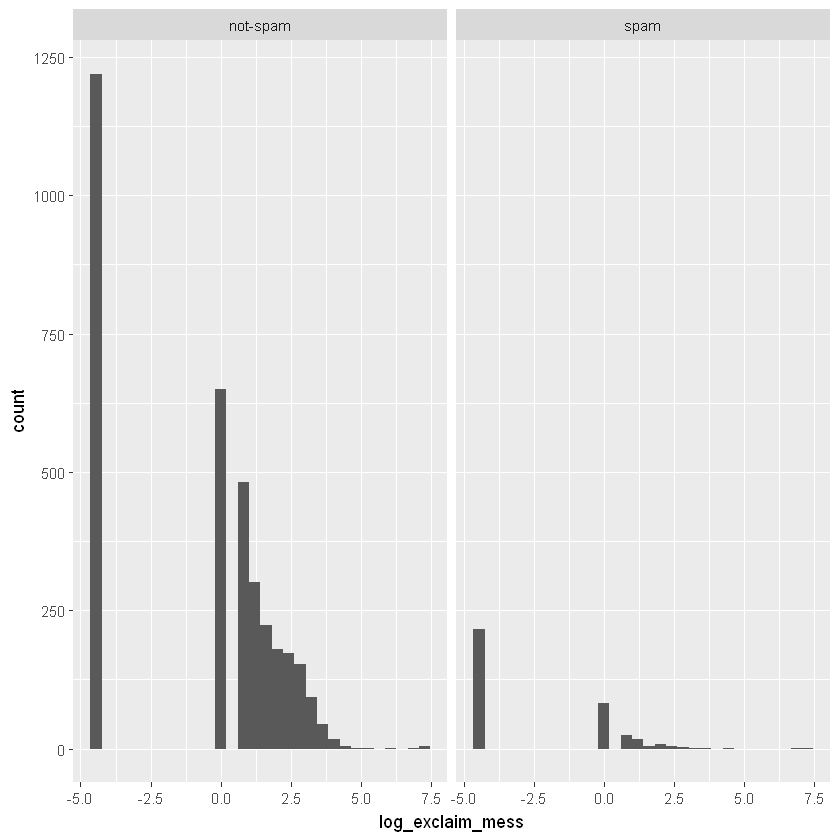

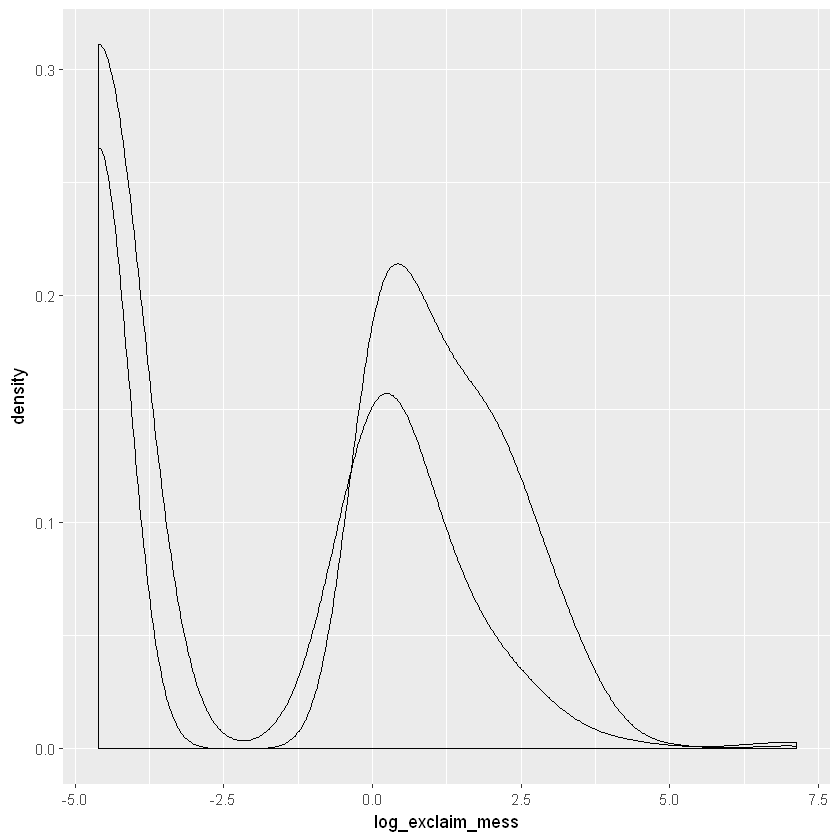

In [26]:
# Compute center and spread for exclaim_mess by spam
email %>%
    group_by(spam) %>%
    summarise(median(exclaim_mess),
              IQR(exclaim_mess))

# Create plot for spam and exclaim_mess
email_log_tr <- 
email %>%
    mutate(log_exclaim_mess = log(exclaim_mess + 0.01))

# Boxplot
email_log_tr %>%
    ggplot(aes(x = spam, y = log_exclaim_mess)) +
    geom_boxplot()

# Faceted Histogram
email_log_tr %>%
    ggplot(aes(x = log_exclaim_mess)) +
    geom_histogram() +
    facet_wrap(~ spam)

# Overlaed density plots
email_log_tr %>%
    ggplot(aes(x = log_exclaim_mess, fil = as.factor(spam))) +
    geom_density(alpha = 0.3)


## Check-in 1

### Review

* Boxplot of log(num_char)
    - Show the association between spam and the length of the email, as measured by the log number of characters. Here, we could figure out that spam messages are considerably shorter than non-spam messages, but there were still a reasonable amount of overlap in the two distributions of length.
    
* Faceted Histogram of log(exclaim_mess)
    - Both in spam and non-spam messages, the distributions are heavily right-skewed. There are few instances of many exclamation marks being using. 
    
### Zero inflation strategies

* Analyze the two components separately
    - Consider that there are two mechanisms going on:
        - Generating the zeros
        - Generating the non-zeros
* Collapse into two-level categorical variable: Zero vs. Non-zero
    - Mutate the variable into a new variable
    - Some information will be lost but it makes the interpretation whole lot easier
    
### Barchart options

* Stacked barcharts
    - Use fill argument in aesthetics
    - Use position = "fill" argument in geom_bar() function to convert the values to proportions

### Collapsing levels

If it was difficult to work with the heavy skew of exclaim_mess, the number of images attached to each email (image) poses even more of a challenge. Run the following code at the console to get a sense of its distribution:

> table(email$image)

Recall that this tabulates the number of cases in each category (so there were 3811 emails with 0 images, for example). Given the very low counts at the higher number of images, let's collapse image into a categorical variable that indicates whether or not the email had at least one image. In this exercise, you'll create this new variable and explore its association with spam.

INSTRUCTIONS

Starting with email, form a continuous chain that links together the following tasks:

* Create a new variable called has_image that is TRUE where the number of images is greater than zero and FALSE otherwise.
* Create an appropriate plot with email to visualize the relationship between has_image and spam.


   0    1    2    3    4    5    9   20 
3811   76   17   11    2    2    1    1 

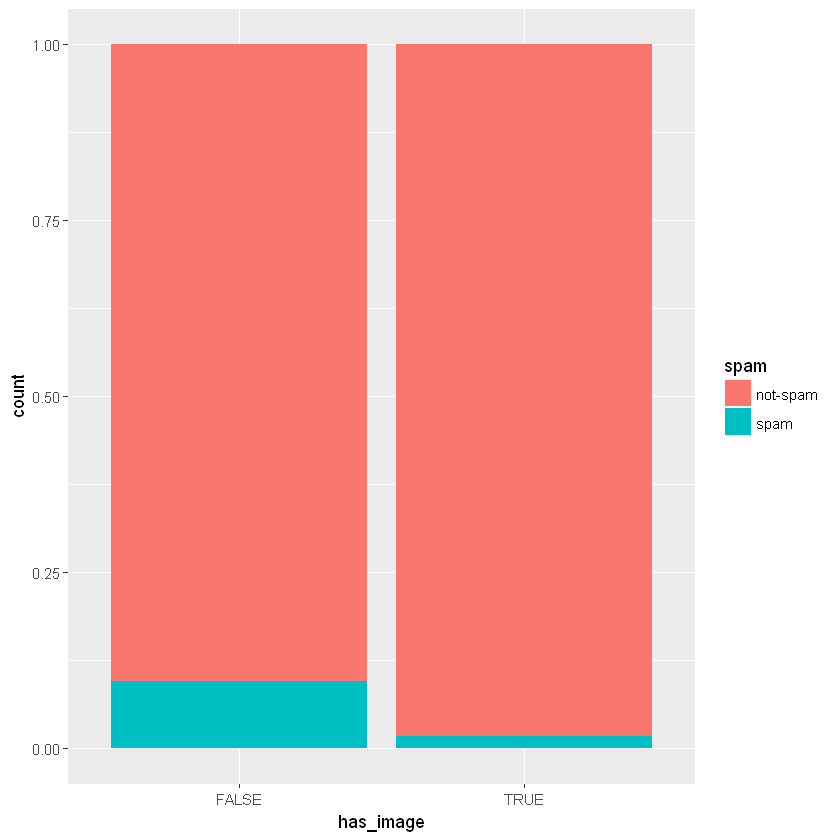

In [27]:
# Make a frequency table of image in email data set
table(email$image)

# Create plot of proportion of spam by image
email %>%
    mutate(has_image = image > 0) %>%
    ggplot(aes(x = has_image, fill = spam)) +
    geom_bar(position = 'fill')

### Data Integrity

In the process of exploring a dataset, you'll sometimes come across something that will lead you to question how the data were compiled. For example, the variable num_char contains the number of characters in the email, in thousands, so it could take decimal values, but it certainly shouldn't take negative values.

You can formulate a test to ensure this variable is behaving as we expect:

> email$num_char < 0

If you run this code at the console, you'll get a long vector of logical values indicating for each case in the dataset whether that condition is TRUE. Here, the first 1000 values all appear to be FALSE. To verify that all of the cases indeed have non-negative values for num_char, we can take the sum of this vector:

> sum(email$num_char < 0)

This is a handy shortcut. When you do arithmetic on logical values, R treats TRUE as 1 and FALSE as 0. Since the sum over the whole vector is zero, you learn that every case in the dataset took a value of FALSE in the test. That is, the num_char column is behaving as we expect and taking only non-negative values.

INSTRUCTIONS

Consider the variables image and attach. You can read about them with ?email, but the help file is ambiguous: do attached images count as attached files in this dataset?

* Design a simple test to determine if images count as attached files. This involves creating a logical condition to compare the values of the two variables, then using sum() to assess every case in the dataset. Recall that the logical operators are < for less than, <= for less than or equal to, > for greater than, >= for greater than or equal to, and == for equal to.

In [29]:
# Test if images count as attachments
sum(email$image > email$attach)

[1] 0

### Answering questions with chains

When you have a specific question about a dataset, you can find your way to an answer by carefully constructing the appropriate chain of R code. For example, consider the following question:

"Within non-spam emails, is the typical length of emails shorter for those that were sent to multiple people?"
This can be answered with the following chain:

```
email %>%
   filter(spam == "not-spam") %>%
   group_by(to_multiple) %>%
   summarize(median(num_char))
```

The code makes it clear that you are using num_char to measure the length of an email and median() as the measure of what is typical. If you run this code, you'll learn that the answer to the question is "yes": the typical length of non-spam sent to multiple people is a bit lower than those sent to only one person.

This chain concluded with summary statistics, but others might end in a plot; it all depends on the question that you're trying to answer.

INSTRUCTIONS

Build a chain to answer each of the following questions, both about the variable dollar.

* For emails containing the word "dollar", does the typical spam email contain a greater number of occurrences of the word than the typical non-spam email? Create a summary statistic that answers this question.
* If you encounter an email with greater than 10 occurrences of the word "dollar", is it more likely to be spam or not-spam? Create a barchart that answers this question.

spam,median(dollar)
not-spam,4
spam,2


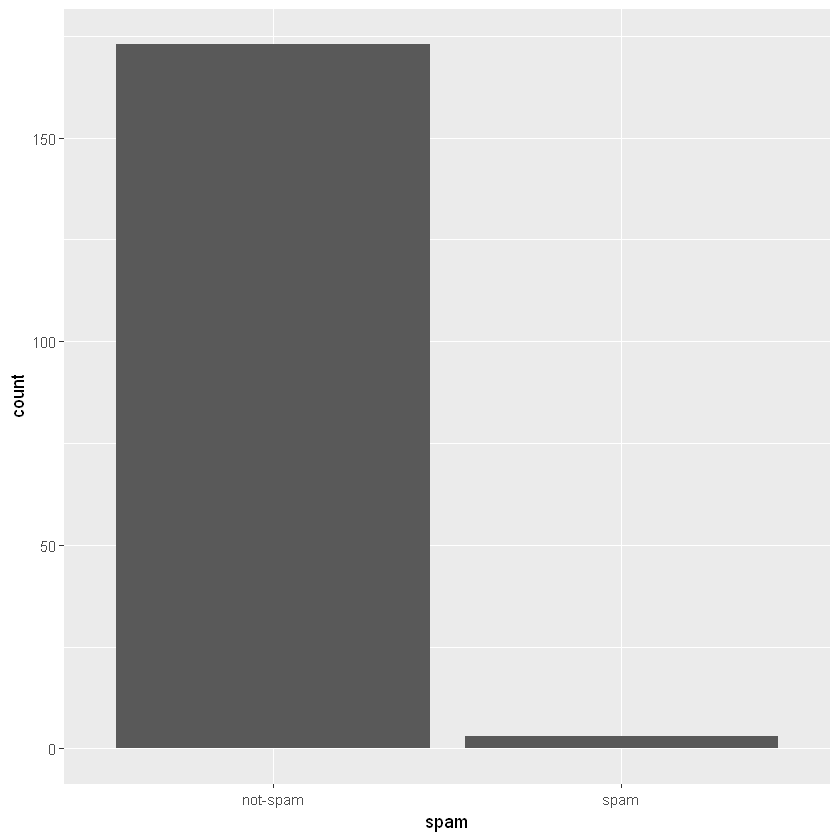

In [30]:
# Question 1
email %>%
    filter(dollar > 0) %>%
    group_by(spam) %>%
    summarize(median(dollar))

# Question 2
email %>%
    filter(dollar > 10) %>%
    ggplot(aes(x = spam)) +
    geom_bar()

## Check-in 2

### Spams and images

* The plot below shows the proportions of spam or not-spam within the subsets of emails that either have an image or do not. Said another way, they are conditioned on the has_image variable.
* We get a slightly different story if we exchange the variables so that we condition on spam.
* If you're building a spam filter, a situation where you don't actually get to see the value of spam, it'd make more sense to think about conditioning on the has_image variable.
* In this case, we can tell that this variable would be an awful spam filter by itself.

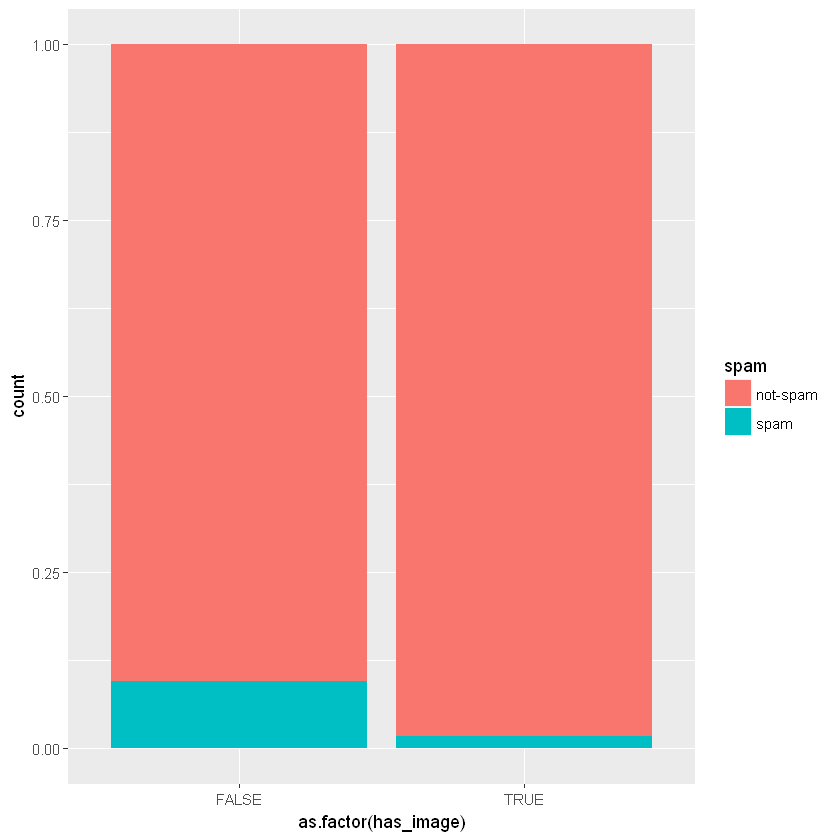

In [31]:
email %>%
    mutate(has_image = image > 0) %>%
    ggplot(aes(x = as.factor(has_image), fill = spam)) +
    geom_bar(position = 'fill')

### Odering bars

* The ordering of the bar isn't determined within the code for the plot, but in the way that R represents that variable.
* If you compare the order of FALSE and TRUE between the plot above and below, you can see the difference.
* You can choose different criteria of ordering:
    - Natural ordering of the levels
    - Arranging the bars in increasing or decreasing order of the height of thebars
    - Alphabetical order, which is the default

NULL

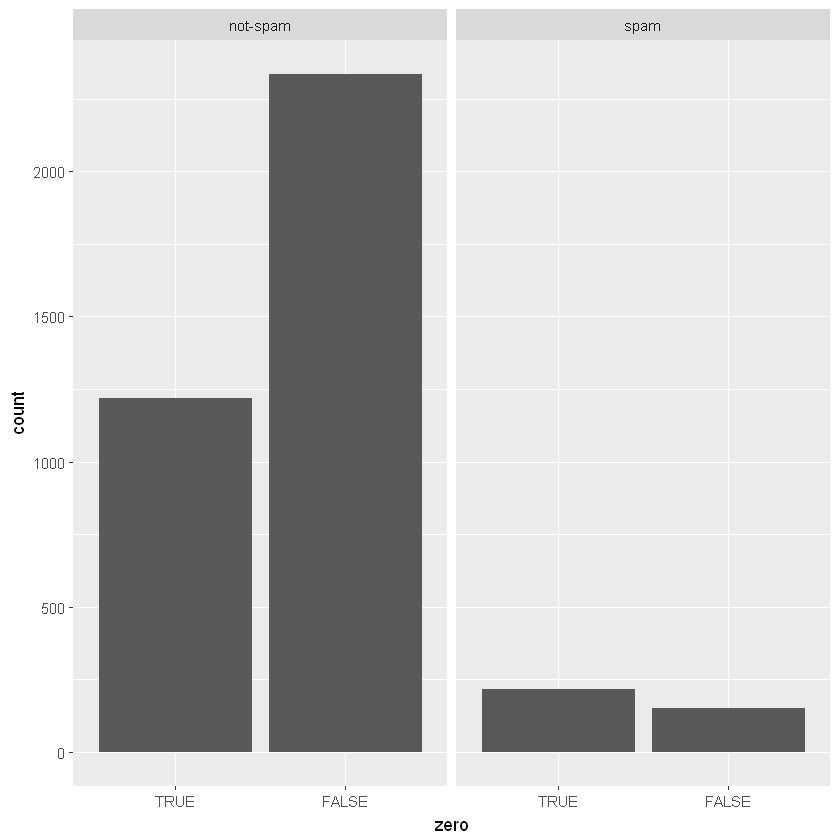

In [33]:
# Mutate a variable and store them in a new vairable
email_new <-
    email %>%
    mutate(zero = exclaim_mess == 0)

# Check the levels of the new value zero
levels(email_new$zero)

# Convert the logical variable zero to factor
email_new$zero <- factor(email_new$zero, levels = c("TRUE", "FALSE"))

# Now plot the data
email_new %>%
    ggplot(aes(x = zero)) +
    geom_bar() +
    facet_wrap(~ spam)

### What's in a number?

Turn your attention to the variable called number. Read more about it by pulling up the help file with ?email.

To explore the association between this variable and spam, select and construct an informative plot. For illustrating relationships between categorical variables, you've seen

* Faceted barcharts
* Side-by-side barcharts
* Stacked and normalized barcharts.

Let's practice constructing a faceted barchart.

INSTRUCTIONS

* Reorder the levels of number so that they preserve the natural ordering of "none", then "small", then "big".
* Construct a faceted barchart of the association between number and spam.

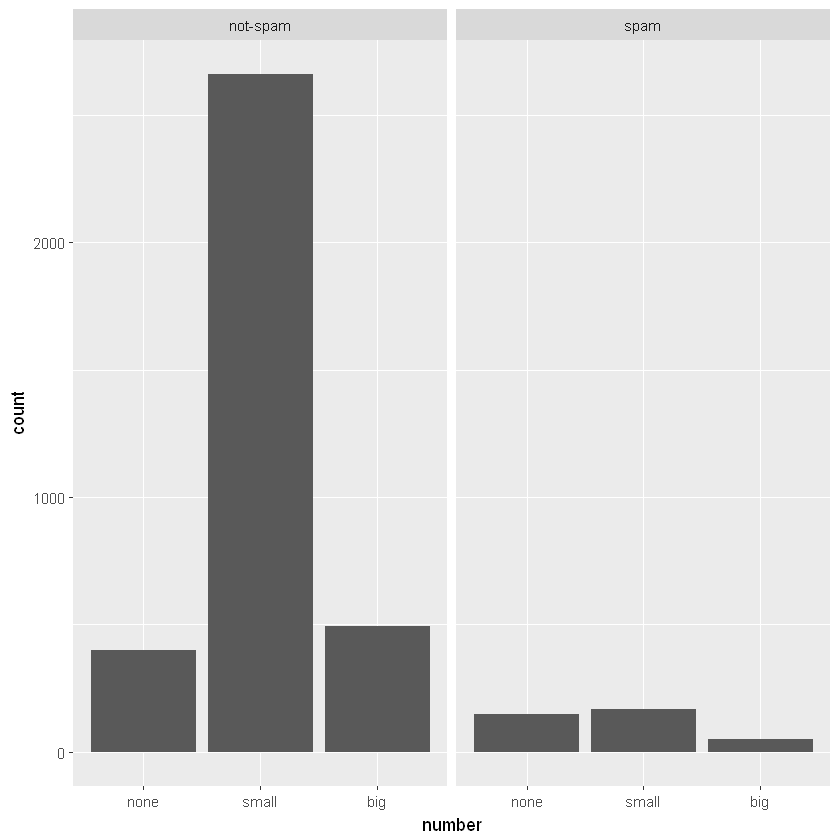

In [37]:
# Reorder levels
email$number <- factor(email$number, levels = c("none", "small", "big"))

# Construct plot of number
ggplot(email, aes(x = number)) +
    geom_bar() +
    facet_wrap(~ spam)